In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
data.shape

(1000, 2)

In [7]:
data.isnull().sum() #to check the missing values

Review    0
Liked     0
dtype: int64

In [8]:
data['Liked'].value_counts() # to check whether the data is balanced or imbalanced 

Liked
1    500
0    500
Name: count, dtype: int64

In [9]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
data['char_count']=data['Review'].apply(len)

In [11]:
data.tail()

,Review,Liked,char_count
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91
999,"Then, as if I hadn't wasted enough of my life ...",0,134


In [12]:
data['word_count'] = data['Review'].apply(lambda x: len(str(x).split()))

In [13]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/5dd43fd0-8734-476a-8841-
[nltk_data]     fb07daaa44af/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data['sentence_count']=data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [17]:
data.tail()

,Review,Liked,char_count,word_count,sentence_count
995,I think food should have flavor and texture an...,0,66,12,1
996,Appetite instantly gone.,0,24,3,1
997,Overall I was not impressed and would not go b...,0,50,10,1
998,"The whole experience was underwhelming, and I ...",0,91,16,1
999,"Then, as if I hadn't wasted enough of my life ...",0,134,28,1


In [18]:
data[data['Liked']==1]['char_count'].mean() # Average of postive reviews 

55.88

In [19]:
data[data['Liked']==0]['char_count'].mean() #Average of neagtive reviews 

60.75

In [20]:
import re

In [21]:
data['Review'][0]

'Wow... Loved this place.'

In [22]:
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])


In [23]:
review

'Wow    Loved this place '

In [24]:
review = review.lower()

In [25]:
review

'wow    loved this place '

In [26]:
review = review.split()

In [27]:
review

['wow', 'loved', 'this', 'place']

In [28]:
from nltk.corpus import stopwords 

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/5dd43fd0-8734-476a-8841-
[nltk_data]     fb07daaa44af/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
all_stopwords = stopwords.words('english')

In [31]:
all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [32]:
review = [word for word in review if word not in set(all_stopwords)]

In [33]:
review

['wow', 'loved', 'place']

In [34]:
from nltk.stem.porter import PorterStemmer

In [35]:
ps = PorterStemmer()

In [36]:
review = [ps.stem(word) for word in review]

In [37]:
review = " ".join(review)

In [38]:
review

'wow love place'

In [39]:
import re 
custom_stopwords = {'would', 'could', 'should', 'also', 'get', 'got', 'one', 'make', 'go', 'like', 
    'really', 'even', 'use', 'used', 'using', 'thing', 'things', 'much', 'still', 
    'well', 'way', 'say', 'says', 'said', 'done', 'every', 'everyone', 'everything',
    'etc', 'ok', 'okay', 'yeah', 'yes', 'no', 'ha', 'wa', 'us', 'let', 'know', 
    'want', 'need', 'see', 'look', 'looked', 'looking'}
corpus =[]
ps = PorterStemmer()
stop_words = set(stopwords.words('english')) - custom_stopwords

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [40]:
data['processed_text']=corpus

In [41]:
data.head()

,Review,Liked,char_count,word_count,sentence_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust good
2,Not tasty and the texture was just nasty.,0,41,8,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [42]:
pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width=500,height=500,min_font_size=9,background_color="black")

In [45]:
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))

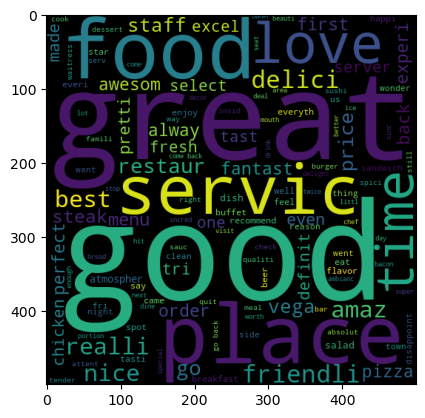

In [46]:
plt.imshow(pos)

In [47]:
negative = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))

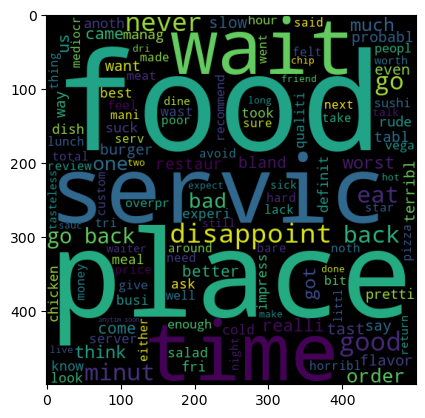

In [48]:
plt.imshow(negative)

In [49]:
data.head()

,Review,Liked,char_count,word_count,sentence_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust good
2,Not tasty and the texture was just nasty.,0,41,8,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [50]:
from sklearn.feature_extraction.text  import CountVectorizer

In [51]:
cv = CountVectorizer(max_features=1500)

In [52]:
x = cv.fit_transform(corpus).toarray()

In [53]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
x.shape

(1000, 1500)

In [55]:
y = data['Liked']

In [56]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [58]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [59]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.73
Confusion Matrix:
 [[55 42]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [60]:
def preprocess_review(text):
    import re
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer

    ps = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    return ' '.join(review)

# Input from user
user_input = input("Enter your restaurant review: ")
processed = preprocess_review(user_input)
vector_input = vectorizer.transform([processed]).toarray()
prediction = model.predict(vector_input)[0]
print("\n Predicted Sentiment:", "Positive" if prediction == 1 else "Negative")


Enter your restaurant review:  Wow... Loved this place


NameError: name 'vectorizer' is not defined